# Twitter API 

## 1. Business Understanding

### 1.1 Overview

### Business Overview
The advancement of technology has enhanced  communication abilities with the use of social media in business and other sectors. Better communication increased the ability of most companies to get in touch with their consumers through an easier and faster medium. Client care is therefore at the core of all successful businesses, because developing customer interactions is one of the keys to increasing customer loyalty. Customer care is traditionally defined as taking care of clients to ensure their pleasure after-sales, managing reports and complaints in the best methods and at the best times. Customers got more demanding in the contemporary period, making the struggle for businesses more difficult. The amazing advancement of computer technology, as well as the expansion of the Internet, has accelerated the shift from analog to digital data communication.  Most companies receive customer service complaints and or 	requests via Twitter especially companies like Kenya Power and Safaricom where the requests can be instantaneous and very frequent. Some of these complaints can require classification in order to be forwarded to the right customer service department or person that specializes or  deals with the problem directly. Say repairs, fraud, communication. 

Safaricom PLC is a leading telecommunications company in Kenya, serving millions of customers across the country. Founded in 1997, the company has grown to become a household name in Kenya, providing a range of services including mobile voice and data services, financial services, and enterprise solutions. One of the main services offered by Safaricom is mobile voice and data services. The company operates a network of over 18,000 mobile towers across Kenya, providing coverage to over 99% of the country's population. Safaricom offers a range of mobile plans to suit different needs and budgets, including prepaid and postpaid options. In addition to voice and data services, Safaricom also offers a range of value-added services such as SMS, M-Pesa, and roaming services. From the products and services offered by Safaricom, the company has a large base of users which creates the challenge of managing all their consumers. Safaricom have done a tremendous job in caring for their consumers all around the country over the years. Through their hotline, physical shops and social media the company has been able to give their consumers undivided attention in sorting any and all challenges faced by these consumers. However, due to the large customer base, some consumers might feel unsatisfied with the customer service offered by Safaricom especially on social media. 

The @Safaricom_care Twitter handle clearly depicts the number of people complaining about different services at a given time. Handling these complaints can be challenging especially since numerous people can tweet about different services at a given time. Customer care remains to be one of the most important elements of a successful business since it maintains the relationship between the company and its consumers. 

### 1.2 Problem Statement

In recent years, a number of companies have migrated to using social media for customer service and customer support, with companies having specific accounts dedicated to customer care queries. This has led to the problem of classifying said complaints or services according to the department that needs to work on them and generate tickets for the services. Numerous customers can tweet about different services at the same time which makes it easy for the company’s staff to miss such complaints. This might be unsatisfactory to the affected consumers which leads to the loss of business. This data comes at a high frequency and so a machine learning model is the easiest way to handle such data and accelerate the response rates. This model will classify all tweets directed to the company’s customer care handle, classify them and direct them to the relevant departments. This will help manage the traffic of complaints made to the customer care handle and increase the speed of responses to the consumers since each department will be responsible for the complaints of their products and services. 


### 1.3 Business Objectives

#### Specific Objectives
>* To identify the departments in which the complaints fall in.
>* To improve customer service efficiency by 50% or more
>* To accelerate customer target marketing
>* To improve branding and customer relations 




### 1.4 Business Success Criteria

We will aim for an accuracy of at least 70% to determine the efficiency and usability of our model. 


## 2. Data Understanding

### 2.1 Collecting the Data

This project will explore and use machine learning models that use datasets from Twitter to analyze tweets and classify the complaints according to the respective departments. 

This data represents records of tweets from the Twitter handle `@Safaricom_Care`. The data was scrapped from Safaricom_Care’s Twitter handle using the `snscrape` library, which provides an easy way to scrape data from Twitter. 

The data contained 1 000 000 records representing any comment made on the `Safaricom_Care` handle, including replies made by `Safaricom_Care`. We decided to get as much data as our computing power could handle to enhance the accuracy of our final model. Each row represents a unique tweet that helps us understand Safaricom’s customer care services and how they can handle various challenges their customers face. In this project, we are interested in understanding the nature of the complaints since we will use them to classify the various complaints made by customers and direct them to the respective departments. 

Each record contains the date on which the tweet was made, the tweet id, the actual text in the tweet, the name of the user who commented, and the number of likes a tweet received. From the overview of the data, we would need to remove the replies made by `Safaricom_Care` since we only need comments made by the customers to build our model. 


In [1]:
! pip install wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541552 sha256=f92db46f9fc0160eb2c8b39a6abc33c4ad71035a2e066ed53b80f86e4e324b7e
  Stored in directory: /root/.cache/pip/wheels/a6/08/fb/98831d1c2702c8352a339f91104515eab5d7906d4118eeeaed
Successfully built wordninja


In [1]:
#Importing the libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
#import snscrape.modules.twitter as sntwitter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import warnings
import re 
import string
import wordninja 
from textblob import Word
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
# importing the libraries for classiffication
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, auc, roc_curve, f1_score, precision_score,recall_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# import os 
# from google.colab import drive
# drive.mount('/content/drive')
# os.listdir('/content/drive/MyDrive/tweaks')

Mounted at /content/drive


['1MillTweets.csv', 'Tweets_API.ipynb']

In [4]:
# #Loading the data set
# tweets_df = pd.read_csv('/content/drive/MyDrive/tweaks/1MillTweets.csv')
# tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john Hello John, the deadline was Octobe...",Safaricom_Care,0
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0


In [ ]:
# #Loading the data set
# tweets_df = pd.read_csv('/content/drive/MyDrive/tweaks/1MillTweets.csv')
# tweets_df.head()

In [2]:
# importing the data
tweets_df = pd.read_csv('1MillTweets.csv')
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john Hello John, the deadline was Octobe...",Safaricom_Care,0
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0


### 2.2 Describing the Data

#### 2.2.1 Description of the columns in the data set:

> * `Datetime` - This refers to the date of the tweet

> * `Tweet Id` - This refers to the unique id of the tweet

> * `Text` - This refers to the actual text in the tweet

> * `Username` - This refers to the name of the user who commented

> * `Like Count` -This refers to the number of likes a tweet receives

#### 2.2.2 Description of the size, statistics and data type

In [3]:
# creating a class that we will use to describe the data

class describing_the_data(object):
      def __init__(self, df):
        self.info = df.info
        self.shape = df.shape
        self.describe = df.describe()
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()

In [4]:
#Instantiating the class
data_description = describing_the_data(tweets_df)

In [5]:
# describe the data type of the columns
data_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Datetime   1000001 non-null  object
 1   Tweet Id   1000001 non-null  int64 
 2   Text       1000001 non-null  object
 3   Username   1000001 non-null  object
 4   LikeCount  1000001 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.1+ MB


In [6]:
#shape of the data
data_description.shape

(1000001, 5)

In [7]:
#descriptive statistics of the data
data_description.describe

,Tweet Id,LikeCount
count,1.000001e+06,1.000001e+06
mean,1.342273e+18,7.958292e-01
std,1.550978e+17,2.739744e+01
min,1.055776e+18,0.000000e+00
25%,1.226837e+18,0.000000e+00
50%,1.322460e+18,0.000000e+00
75%,1.475853e+18,0.000000e+00
max,1.603175e+18,1.028200e+04


In [8]:
#checking for duplicates
data_description.duplicates

0

In [9]:
#checking for missing values
data_description.missing

Datetime     0
Tweet Id     0
Text         0
Username     0
LikeCount    0
dtype: int64

## 3. Data Preparation

### 3.1 Data Cleaning

In [10]:
#Removing Tweets by Safaricom in order to have tweets from their customers only
tweets_df = tweets_df[tweets_df['Username'] != 'Safaricom_Care']

In [11]:
#Instantiating the class
data_description_2 = describing_the_data(tweets_df)

In [12]:
data_description_2.shape

(740364, 5)

In [13]:
# Defining functions to clean data
def lower_case(tweet):
    tweet = tweet.lower() 
    return tweet


def remove_links(tweet):
    tweet = re.sub(r"https\S+"," ",tweet) #removes weblinks
    tweet = re.sub(r"bit.ly/\S+", " ",tweet) #removes weblinks
    return tweet

def remove_user(tweet):
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',str(tweet)) #removes @user information
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',str(tweet))#removes @user information
    return tweet

   
def remove_hashtags(tweet):
    tweet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet) #removes the hashtags
    return tweet
    
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def remove_stopwords(tweet):
    stop_words = stopwords.words('english')
    new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
                 "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
                 "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
                 "trying", "guys", "happening"]
    stop_words.extend(new_stopwords)
    tweet = tweet.join(word for word in tweet.split () if word not in (stop_words))
    return tweet

def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""
    tweet = lower_case(tweet)
#     tweet = tokenization(tweet)
    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = deEmojify(tweet)
#     tweet = remove_stopwords(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet


In [14]:
#creating a new column with the clean tweets
clean_data=[]
for i in tweets_df["Text"]:
    clean_data.append(basic_clean(i))

tweets_df['Clean_Tweets']=clean_data
    

In [15]:
# checking the df
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,@enockmogaka7 @SafaricomPLC @Safaricom_Care Th...,cellestialtech,0,the man is dead you buggers still holding ...


In [16]:
# new dataframe
df = tweets_df[['Datetime','Tweet Id', 'Username', 'Clean_Tweets']]
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...


In [17]:
# making the Datetime column of type 'Datetime'
df['Datetime'] = pd.to_datetime(df['Datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740364 entries, 0 to 1000000
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Datetime      740364 non-null  datetime64[ns, UTC]
 1   Tweet Id      740364 non-null  int64              
 2   Username      740364 non-null  object             
 3   Clean_Tweets  740364 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 28.2+ MB


In [18]:
# creating a new column for the hours tweets were made
df["hour"] = df["Datetime"].apply(lambda x: x.hour)
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...,23
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...,23
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...,23
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...,23


In [19]:
# a function for categorizing time
def get_time(hour):
  """ This function checks the time a tweet was tweeted and categorizes it as morning evening or afternoon"""
  if hour >= 6 and hour < 12:
         return 'Morning'
  if hour > 12 and hour < 18:
        return 'Afternoon'
  if hour >= 18 and hour < 22:
        return 'Evening'
  else:
    return 'Night'

In [20]:
# creating a column for the categories and checking the value_counts
df['Time_of_Day'] = df['hour'].apply(get_time)
df['Time_of_Day'].value_counts()

Morning      290148
Afternoon    223601
Night        142479
Evening       84136
Name: Time_of_Day, dtype: int64

In [21]:
#Removing stopwords
stop_words = stopwords.words('english')
new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
                 "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
                 "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
                 "trying", "guys", "happening"]
stop_words.extend(new_stopwords)
df["Clean_Tweets"] = df["Clean_Tweets"].apply(lambda x: ' '.join(word for word in x.split () if word not in (stop_words)))
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Night
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Night
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Night
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Night
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship,23,Night


In [22]:
# mapping the clean tweets to a new column in the dataframe
ls2=[]
for i in df["Clean_Tweets"]:
    ls2.append(basic_clean(i))

df['Clean_Tweets']=ls2
# check the df
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Night
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Night
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Night
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Night
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship,23,Night
...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning


### 3.2 Creating Labels
----

In [23]:
# creating labels

# frequent words n tweets for categorization
mpesa = {"pesa", "m-pesa", "esa", "send money", "mpesa", "money", "till", "fuliza", "reverse", "transaction", 
         "transactions" "reversal" , "agent", "paybill", "buygoods", "statement", "loan", "bank", "cash", "recipient", 
         "mshwari", "withdraw","lipa", "reversed", "sentmoney", "kcb", "pay", "pochi", "pochilabiashara", "refund"}
voice = {"credit", "card",'credo', "okoa","credit", "airtime", "call", "minutes", "calls", "phone", "jahazi"}
internet = {"fibre", "fiber", "faiba",'safaricom home', "data", "internet", "bundles", "bundle", "network", "gb", "wifi", 
            "connection", "youtube", "net", "mbps", "mbs", "mb", "hanging"}
valueaddedservices = {"bonga", "daima" , "lipamdogomdogo", "hustler", "points", "customerobsessionmonth", "twendetukiuke" , 
                      "safaricomforyou", "uteowafuraha", "birthday", "app", "zuri", "csmonth", "tuinuane"}
customercare = {"simcards", "customer", "service", "customerservice", "poor", "problem", "register", "registration", 
                "registered", "scam", "sim"}
def label_tweet(tweet):
    if mpesa.intersection(tweet.split(" ")):
        return "mpesa"
    elif internet.intersection(tweet.split(" ")):
        return "internet"
    elif voice.intersection(tweet.split(" ")):
        return "voice"
    elif valueaddedservices.intersection(tweet.split(" ")):
        return "valueaddedservices"
    elif customercare.intersection(tweet.split(" ")):
        return "customercare"
    else:
        return "general"
# Add a new column to the dataframe with the labels for each tweet
df["Category"] = df['Clean_Tweets'].apply(label_tweet)
df["Category"].value_counts()


general               449071
mpesa                 120245
internet               87633
voice                  43895
customercare           25666
valueaddedservices     13854
Name: Category, dtype: int64

In [24]:
# removing tweets with less than three words 
df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: x if len(x.split()) > 3 else None)
df = df.dropna()
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Night,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Night,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Night,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship,23,Night,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Night,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


### 3.3 Exploratory Data Analysis

---



In [25]:
# this class performs basic EDA and plots different visualizations from univariate to multivariate data
class EDA():
    def __init__(self,data):
        self.data = data
        self.category = data['Category']
        self.labels = (set(data['Category'].values))

    def plot_3d_pie_chart(self):
        """This function plots a basic 3d Pie Chart"""
        # Set figure size and style
        plt.figure(figsize=(8, 8))
        sns.set_style('darkgrid')
        # Create pie chart
        colors = ['#648fa9', '#8295c1', '#E5BDFF',	'#9382c1', '#663399' ,'#4F2671']
        
        wedges = plt.pie((self.category).value_counts(), labels =self.labels,colors = colors, autopct='%.2f%%', shadow = True)

        # Set pie chart properties
        plt.title('Pie Chart of Complaints per Department')
        plt.legend( labels, title='Labels', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
        plt.axis('equal')
          # Show plot
        plt.show()

    def count_plot(self,column):
        """This function  creates an sns countplot for a given column"""
        plt.figure(figsize=(16,8))
        sns.countplot(x=column,data=self.data, order=self.data[column].value_counts().iloc[:6].index, palette='BuPu')
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.xticks(rotation=90)
        plt.show();

    def histogram(self,column):
        """This function  creates a histogram for a given column"""
        self.data[column].apply(len).plot(bins=100, kind = 'hist',figsize = (11,8),color="purple")
        plt.title('Length frequency of all tweets')
        plt.xlabel("Characters")
        plt.show()

    def word_cloud(self, column):
        """This function  creates a word cloud for a given column"""
        sentences = self.data[column].tolist()
        sentences_ss = " ".join(sentences)
        plt.figure(figsize=(15,15))
        # plt.imshow(WordCloud(background_color='white', mask=twitter_mask).generate(sentences_ss))
        plt.imshow(WordCloud().generate(sentences_ss))
        plt.grid(False)
        plt.tight_layout(pad=0)

    def bi_variate_analysis(self, column1, column2):
        """This function  creates an sns bi-variate countplot for a given column"""
        plt.figure(figsize=(15,10))
        #set seaborn plotting aesthetics
        sns.set(style='white')
        #create grouped bar chart
        sns.countplot(x=column1, hue=column2, data=self.data,
                    palette = ['#648fa9', '#8295c1', '#E5BDFF',	'#9382c1', '#663399' ,'#4F2671'] )
        #add overall title
        plt.title(f'{column1} vs {column2}', fontsize=16)
        #add axis titles
        plt.xlabel(column1)
        plt.ylabel('Count')
        #rotate x-axis labels
        plt.xticks(rotation=45)

#### 3.3.1 Univariate Data Analysis

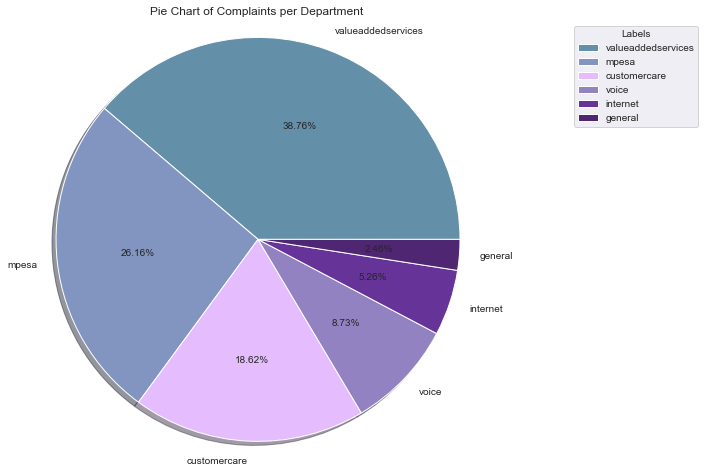

In [26]:
# plotting a pie chart for the tweet categories
#Labels pie chart
labels= set(df['Category'].values)
Exploratory_Data_Analysis = EDA(df)
Exploratory_Data_Analysis.plot_3d_pie_chart()


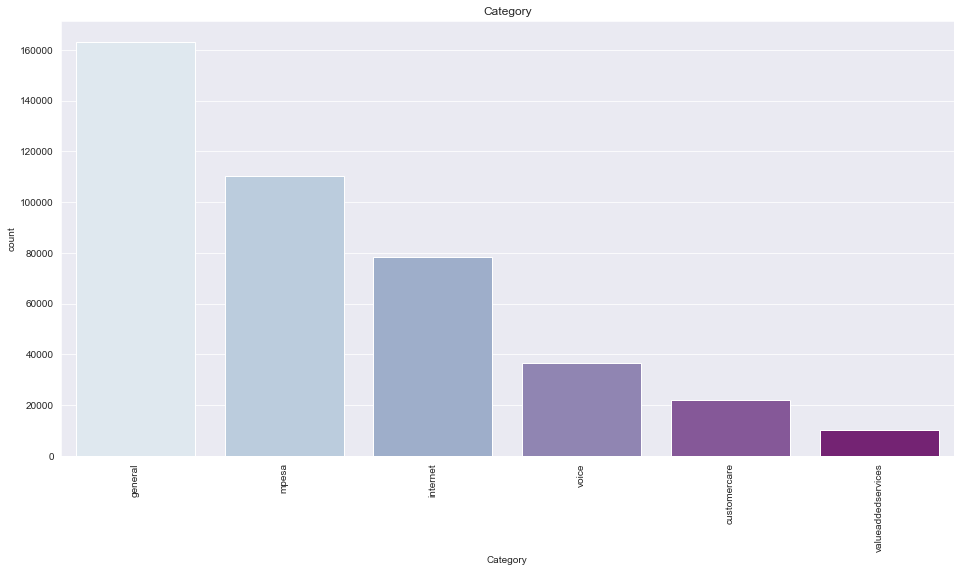

In [27]:
# Labels Countplot
Exploratory_Data_Analysis.count_plot('Category')

The `general` category has the most tweets at 34.86% of the tweets while the `voice` category has the least tweets at 4.79% of the tweets.

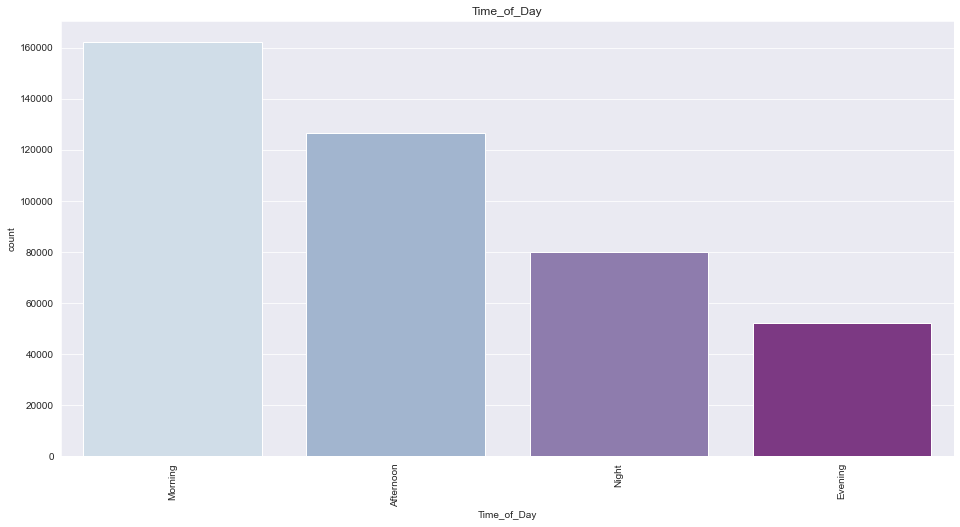

In [28]:
# Time of Day Countplot
Exploratory_Data_Analysis.count_plot('Time_of_Day')

Most of the tweets are sent in the morning which is between 0600 Hrs and 1200 Hrs.

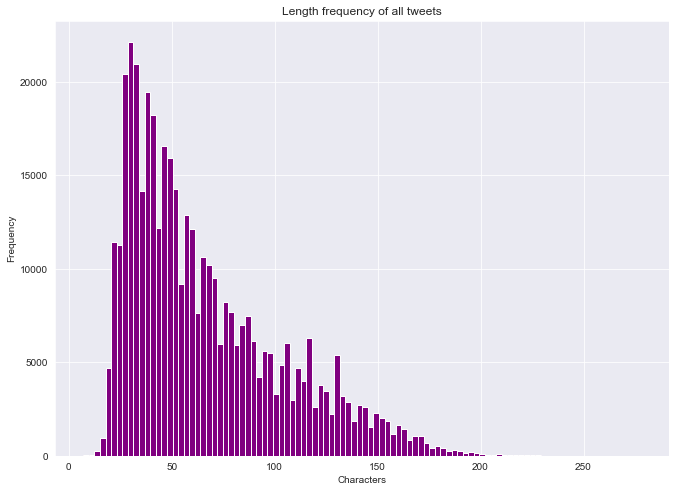

In [29]:
# Plotting a histogram of the characters of tweets(number of words in a tweet)
Exploratory_Data_Analysis.histogram('Clean_Tweets')


Most tweets have an average length of 50 characters.

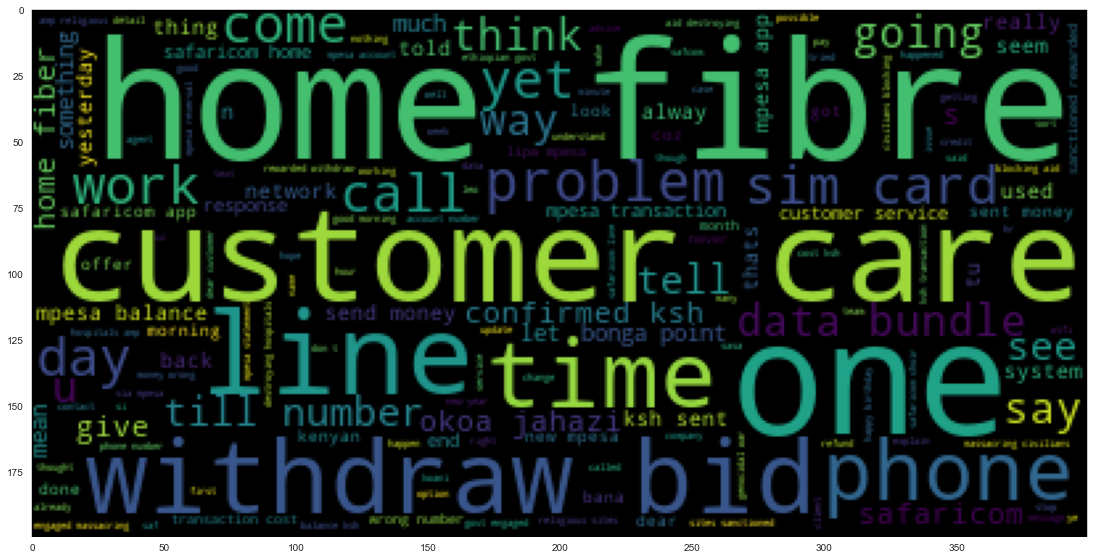

In [30]:
# plotting  a word_cloud of the most frequent words
Exploratory_Data_Analysis.word_cloud('Clean_Tweets')


In [31]:
# frequent words
freq = pd.Series(' '.join(df.Clean_Tweets).split()).value_counts()[0:50]
freq

mpesa          52839
safaricom      48998
number         37064
money          25868
data           22538
line           20765
home           20692
one            20202
internet       19604
call           19169
customer       18668
account        18418
bundles        17355
amp            16601
service        15733
time           15055
airtime        15051
sent           14863
transaction    14620
ksh            14529
network        13989
app            13867
fibre          13514
phone          12855
care           12138
wrong          11713
yet            11512
day            11283
send           11242
back           10730
services       10568
new            10288
message        10055
messages        9615
days            9426
reverse         9232
problem         9056
working         8972
pay             8875
good            8832
till            8797
go              8745
sim             8573
calls           8494
last            8238
gb              8147
balance         8121
make         

#### 3.3.2 Bivariate Data Analysis

---

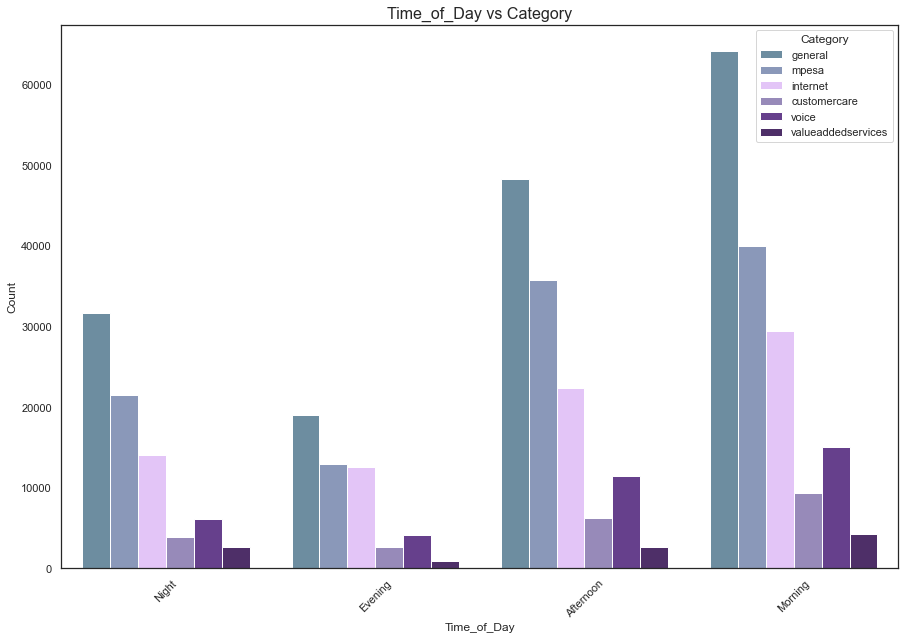

In [32]:
Exploratory_Data_Analysis.bi_variate_analysis('Time_of_Day', 'Category' )

Most of the tweets are sent in the morning. In addition, higher Mpesa related tweets are sent in the afternoon than in the evening.

# 4. Modelling 
----

In [33]:
# preview the dataframe
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Night,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Night,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Night,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship,23,Night,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Night,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


In [34]:
# get numeric codes for the categories
df["Category"] = df["Category"].astype('category')

df["cat_num"] = df["Category"].cat.codes


In [35]:
# check the counts
df['cat_num'].value_counts()

1    163205
3    110153
2     78401
5     36775
0     22160
4     10345
Name: cat_num, dtype: int64

In [36]:
df['Category'].value_counts()

general               163205
mpesa                 110153
internet               78401
voice                  36775
customercare           22160
valueaddedservices     10345
Name: Category, dtype: int64

In [37]:
X= df['Clean_Tweets']
y= df["cat_num"]
# Splitting the values to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)

#vectorize X_TRAIN AND X_TEST using tfidf vectorizer
tfidf= TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train

<294727x132359 sparse matrix of type '<class 'numpy.float64'>'
	with 2739535 stored elements in Compressed Sparse Row format>

In [38]:
# encoding the labels for the classes to be used in getting the ROC
label_encoder=LabelEncoder()
label_encoder.fit(y)
y1=label_encoder.transform(y)
classes=label_encoder.classes_

In [39]:
#Defining a class for the classification models
class classification_model():
    def __init__(self, model, X_train, y_train, X_test, y_test):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.pred_test = None
    def fit_and_predict(self):
        print('**Fitting the train data...**')
        self.model.fit(self.X_train, self.y_train)
#         print('**Predicting the test data...**')
#         self.pred_test = self.model.predict(self.X_test)
        accuracy = self.model.score(X_test, y_test)
        print('**Accuracy for the predicted result is ' + str(accuracy*100) + '% **')
        self.pred_test= self.model.predict(X_test)
        target_names = ['customer_care', 'general', 'internet', 'mpesa', 'value_added_services', 'voice']
        labels = [0,1,2,3,4,5]
        report = classification_report(self.y_test, self.pred_test, target_names=target_names, labels=labels, output_dict=True)
        cl_report = pd.DataFrame(report).transpose()
        return cl_report
    def confusion_matrix(self):
      """ A function to plot the ConfusionMatrix"""
      ConfusionMatrixDisplay.from_predictions(y_test, self.pred_test); 

    def ROC(self):
        """ A function to plot the ROC and AUC for a multiclass problem"""
        pred_prob = self.model.predict_proba(self.X_test)
        y_test_binarized=label_binarize(self.y_test,classes=np.unique(self.y_test))
        fpr = {}
        tpr = {}
        thresh ={}
        roc_auc = dict()
        n_class = classes.shape[0]
        for i in range(n_class):
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            # plotting
            plt.plot(fpr[i], tpr[i], linestyle='--',
                     label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
        plt.plot([0,1],[0,1],'b--')
        plt.xlim([0,1])
        plt.ylim([0,1.05])
        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='lower right')
        plt.show()
    def score(self):
        """This function outputs the accuracy, recall and f1 scores for the models"""
        y_pred_test = self.pred_test
        y_pred_train = self.model.predict(X_train)
        
        #Accuracy for both test and train
        test_accuracy = accuracy_score(y_test,y_pred_test)
        train_accuracy = accuracy_score(y_train,y_pred_train)
        
        #Precision on test only for now
        precision =precision_score(y_test, y_pred_test,average="weighted")

        #Recall for test 
        recall =recall_score(y_test, y_pred_test,average="weighted")
        
        #F1 on test set
        f1_test = f1_score(y_test,y_pred_test,average="weighted")

        return {
            "Train accuracy": train_accuracy,  
            "Test accuracy": test_accuracy,
            "Test Recall" :recall,
            "Test Precision":precision,
            "Test F1 score": f1_test
            }

#### 4.1. KNN Model

In [40]:
# instatiating a KNN Classifier
knn= KNeighborsClassifier()

Knn = classification_model(knn, X_train, y_train, X_test, y_test)


In [41]:
# Fit and Scoring the model
fit_n_report = Knn.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 54.30125403762113% **


,precision,recall,f1-score,support
customer_care,0.705060,0.157801,0.257884,6711.000000
general,0.466627,0.976012,0.631390,49066.000000
internet,0.861524,0.236802,0.371493,23488.000000
mpesa,0.913509,0.332157,0.487175,33165.000000
value_added_services,0.847487,0.322985,0.467719,3028.000000
voice,0.829686,0.192095,0.311962,10854.000000
accuracy,0.543013,0.543013,0.543013,0.543013
macro avg,0.770649,0.369642,0.421270,126312.000000
weighted avg,0.710390,0.543013,0.493979,126312.000000


In [42]:
# confusion Matrix
conf_matrix = Knn.confusion_matrix()
conf_matrix

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

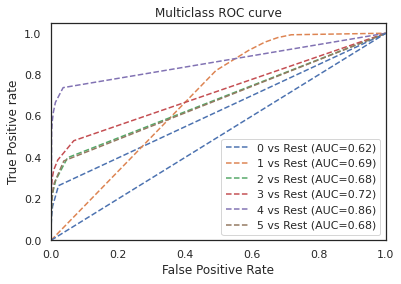

In [ ]:
# plotting the ROC 
roc = Knn.ROC()

In [ ]:
# instatiating a dataframe for evaluating the different models
evaluation_df= pd.DataFrame()
evaluation_df['KNN']= Knn.score().values()
evaluation_df.index=['Train accuracy','Test accuracy','Test Recall','Test Precision','Test F1 score']
evaluation_df

,KNN
Train accuracy,0.568161
Test accuracy,0.547589
Test Recall,0.547589
Test Precision,0.724015
Test F1 score,0.510468


### 4.2. Decision Tree 

In [ ]:
#instantiatiating a Decision Tree model 
d_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3 , min_samples_split= 100)
Tree = classification_model(d_tree, X_train, y_train, X_test, y_test)

In [ ]:
# Fit and Scoring the model
fit_n_report = Tree.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 71.05355581626476% **


,precision,recall,f1-score,support
customer_care,0.000000,0.000000,0.000000,6357.000000
general,0.555456,0.999292,0.714023,46578.000000
internet,0.982546,0.771319,0.864213,23793.000000
mpesa,0.998983,0.613458,0.760132,33616.000000
value_added_services,0.907303,0.508350,0.651611,11976.000000
voice,0.870621,0.302443,0.448932,11503.000000
accuracy,0.710536,0.710536,0.710536,0.710536
macro avg,0.719151,0.532477,0.573152,133823.000000
weighted avg,0.774995,0.710536,0.690018,133823.000000


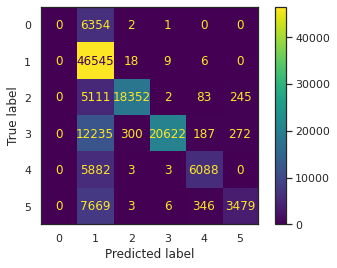

In [ ]:
# Scoring the model
conf_matrix = Tree.confusion_matrix()
conf_matrix

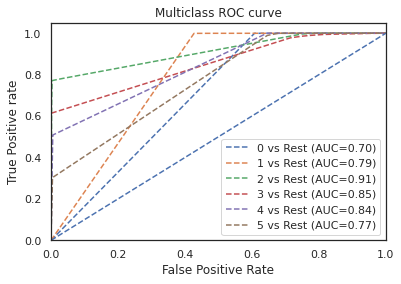

In [ ]:
# plotting the ROC 
roc = Tree.ROC()

In [ ]:
# comparing the two models
evaluation_df['Tree']= Tree.score().values()
evaluation_df


,KNN,Tree
Train accuracy,0.568161,0.711013
Test accuracy,0.547589,0.710536
Test Recall,0.547589,0.710536
Test Precision,0.724015,0.774995
Test F1 score,0.510468,0.690018



### 4.3. Random Forest

In [ ]:
# fitting a random forest with 2 trees
forest = RandomForestClassifier(n_estimators= 2, random_state=2 )
Forest = classification_model(forest, X_train, y_train, X_test, y_test)

In [ ]:
# Scoring the model
fit_n_report = Forest.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 80.84559455400043% **


,precision,recall,f1-score,support
customer_care,0.544245,0.830109,0.657447,6357.000000
general,0.768505,0.935313,0.843743,46578.000000
internet,0.816873,0.796411,0.806512,23793.000000
mpesa,0.903268,0.748334,0.818534,33616.000000
value_added_services,0.928377,0.795508,0.856822,11976.000000
voice,0.932463,0.496914,0.648330,11503.000000
accuracy,0.808456,0.808456,0.808456,0.808456
macro avg,0.815622,0.767098,0.771898,133823.000000
weighted avg,0.828704,0.808456,0.806315,133823.000000


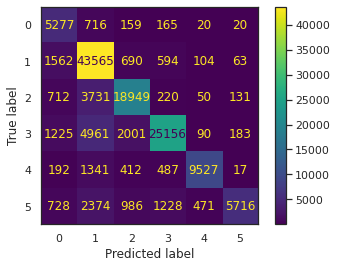

In [ ]:
# plot a confusion matrix
conf_matrix = Forest.confusion_matrix()
conf_matrix

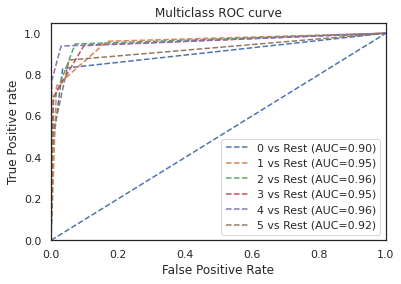

In [ ]:
# plotting the ROC 
roc = Forest.ROC()

In [ ]:
# comparing the three models
evaluation_df['Forest']= Forest.score().values()
evaluation_df

,KNN,Tree,Forest
Train accuracy,0.568161,0.711013,0.930755
Test accuracy,0.547589,0.710536,0.808456
Test Recall,0.547589,0.710536,0.808456
Test Precision,0.724015,0.774995,0.828704
Test F1 score,0.510468,0.690018,0.806315


##### Decision Trees with GridSearchCV

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # create a list of values for each hyperparameter that you want to tune
# n_estimators = [10, 50, 100]
# max_depth = [None, 5, 10]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]

# # create a parameter grid using the values you defined above
# param_grid = {'n_estimators': n_estimators,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf}

# # create a random forest classifier
# clf = RandomForestClassifier()

# # create a grid search object using the parameter grid and the random forest classifier
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # fit the grid search object to your training data
# grid_search.fit(X_train, y_train)

# # print the best parameters and score found on the training set
# print(grid_search.best_params_)
# print(grid_search.best_score_)

# # use the best parameters to make predictions on the test set
# y_pred = grid_search.predict(X_test)

### Boosted Models.

### 4.4. XGB Classifier. 

In [ ]:
# Instantiate an XGB Model
xgb= XGBClassifier()
Xgb = classification_model(xgb, X_train, y_train, X_test, y_test)


In [ ]:
# Scoring the model
fit_n_report= Xgb.fit_and_predict()
fit_n_report

**Fitting the train data...**
**Accuracy for the predicted result is 94.72437473379016% **


,precision,recall,f1-score,support
customer_care,0.908358,0.921504,0.914884,6357.000000
general,0.925916,0.998454,0.960818,46578.000000
internet,0.967332,0.922204,0.944229,23793.000000
mpesa,0.998885,0.906384,0.950389,33616.000000
value_added_services,0.922635,0.951987,0.937081,11976.000000
voice,0.912358,0.920369,0.916346,11503.000000
accuracy,0.947244,0.947244,0.947244,0.947244
macro avg,0.939247,0.936817,0.937291,133823.000000
weighted avg,0.949316,0.947244,0.947120,133823.000000


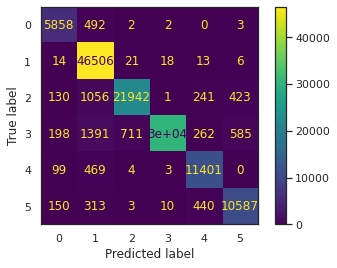

In [ ]:
# plot a confusion matrix
conf_matrix = Xgb.confusion_matrix()
conf_matrix

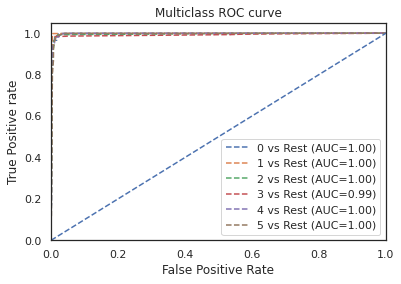

In [ ]:
# plotting the ROC 
roc = Xgb.ROC()


In [ ]:
# comparing the three models
evaluation_df['XGB']= Xgb.score().values()
evaluation_df

,KNN,Tree,Forest,XGB
Train accuracy,0.568161,0.711013,0.930755,0.946825
Test accuracy,0.547589,0.710536,0.808456,0.947244
Test Recall,0.547589,0.710536,0.808456,0.947244
Test Precision,0.724015,0.774995,0.828704,0.949316
Test F1 score,0.510468,0.690018,0.806315,0.947120


### Model Evaluation

In [ ]:
# performance of the models so far
evaluation_df

,KNN,Tree,Forest,XGB
Train accuracy,0.568161,0.711013,0.930755,0.946825
Test accuracy,0.547589,0.710536,0.808456,0.947244
Test Recall,0.547589,0.710536,0.808456,0.947244
Test Precision,0.724015,0.774995,0.828704,0.949316
Test F1 score,0.510468,0.690018,0.806315,0.947120


### 4.5. Neural Networks

In [65]:
# importing libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense, Activation
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import pad_sequences
from keras.layers import Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from numpy import argmax


In [66]:
# a function to vectorize and pad the words
def prep_data(X, target):
  y = pd.get_dummies(target).values
  tokenizer = Tokenizer(num_words=20000)
  tokenizer.fit_on_texts(list(X))
  list_tokenized_tweets = tokenizer.texts_to_sequences(X)
  X_t = pad_sequences(list_tokenized_tweets, maxlen=100)
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X_t, y, random_state= 42, test_size= 0.2)
  return X_train1, X_test1, y_train1, y_test1



In [67]:
class tweets_classifier:
    def __init__(self, num_words=20000, embedding_size=128, lstm_size=25, dropout_rate=0.5):
        self.num_words = num_words
        self.embedding_size = embedding_size
        self.lstm_size = lstm_size
        self.dropout_rate = dropout_rate
        
        # Create the model
        self.model = Sequential()
        self.model.add(Embedding(self.num_words, self.embedding_size))
        self.model.add(LSTM(self.lstm_size, return_sequences=True))
        self.model.add(GlobalMaxPool1D())
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(50, activation= 'relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(6, activation='softmax'))
        #compile the model
        self.model.compile(loss='categorical_crossentropy', 
                           optimizer='adam', 
                           metrics=['accuracy'])
        self.model.summary()
    
    def fit(self, X_train, y_train, epochs=3, batch_size=32, validation_split=0.1):
        self.model.fit(X_train1, y_train1, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    
    def evaluate (self, X_test, y_test):
      test_loss, test_acc = self.model.evaluate(X_test, y_test)
      return {'Test loss:', test_loss,
              'Test accuracy:', test_acc
      }
      
      
    def predict_score(self, X_train, X_test, y_train, y_test):
      predictions= self.model.predict(X_test)
      predictions_train= self.model.predict(X_train)

      y_pred_test= (predictions > 0.5)
      y_pred_train= (predictions_train > 0.5)

      train_accuracy= accuracy_score(y_train, y_pred_train)
      test_accuracy= accuracy_score(y_test, y_pred_test )
      precision = precision_score(y_test, y_pred_test, average='weighted')
      recall = recall_score(y_test, y_pred_test, average='weighted')
      f1_test = f1_score(y_test, y_pred_test, average='weighted')
  
      return {
              "Train Accuracy": train_accuracy,
              "Test Accuracy": test_accuracy,
              "Test Recall" :recall,
              "Test Precision":precision,
              "Test F1 score": f1_test
              }



In [68]:
target= df['Category']
X= df['Clean_Tweets']
# Vectorizing and padding
X_train1, X_test1, y_train1, y_test1 = prep_data(X, target)

# Instantiate the classifier
classifier1 = tweets_classifier()

# Fit the classifier to the training data
classifier1.fit(X_train1, y_train1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 50)                1300      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                        

In [69]:
classifier1.evaluate(X_test1, y_test1)


2788/2788 [==============================] - 38s 14ms/step - loss: 0.0012 - accuracy: 1.0000


{0.0011955577647313476, 0.9999775886535645, 'Test accuracy:', 'Test loss:'}

In [70]:
Neural_Net2 = classifier1.predict_score(X_train1, X_test1, y_train1, y_test1)

11152/11152 [==============================] - 150s 13ms/step


In [71]:
evaluation_df['Neural_Net2'] = Neural_Net2.values()
evaluation_df

,KNN,Tree,Forest,XGB,Neural_Net2
Train accuracy,0.568161,0.711013,0.930755,0.946825,0.999978
Test accuracy,0.547589,0.710536,0.808456,0.947244,0.999978
Test Recall,0.547589,0.710536,0.808456,0.947244,0.999978
Test Precision,0.724015,0.774995,0.828704,0.949316,0.999978
Test F1 score,0.510468,0.690018,0.806315,0.947120,0.999978


In [72]:
class tweet_classifier:
    def __init__(self, num_words=20000, embedding_size=128, lstm_size=25, dropout_rate=0.5):
        self.num_words = num_words
        self.embedding_size = embedding_size
        self.lstm_size = lstm_size
        self.dropout_rate = dropout_rate
        
        # Create the model
        self.model = Sequential()
        #embedding
        self.model.add(Embedding(self.num_words, self.embedding_size))
        self.model.add(LSTM(self.lstm_size, return_sequences=True))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(LSTM(self.lstm_size))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(6, activation='softmax'))
        #compile the model
        self.model.compile(loss='categorical_crossentropy', 
                           optimizer='adam', 
                           metrics=['accuracy'])
        self.model.summary()
    
    def fit(self, X_train1, y_train1, epochs=3, batch_size=32, validation_split=0.1):
        self.model.fit(X_train1, y_train1, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    
    def evaluate (self, X_test1, y_test1):
      test_loss, test_acc = self.model.evaluate(X_test1, y_test1)
      return {'Test loss:', test_loss,
              'Test accuracy:', test_acc
      }
      
      
    def predict_score(self, X_train1, X_test1, y_train1, y_test1):
      predictions= self.model.predict(X_test1)
      predictions_train= self.model.predict(X_train1)

      y_pred_test= (predictions > 0.5)
      y_pred_train= (predictions_train > 0.5)

      train_accuracy= accuracy_score(y_train1, y_pred_train)
      test_accuracy= accuracy_score(y_test1, y_pred_test )
      precision = precision_score(y_test1, y_pred_test, average='weighted')
      recall = recall_score(y_test1, y_pred_test, average='weighted')
      f1_test = f1_score(y_test1, y_pred_test, average='weighted')
  
      return {
              "Train Accuracy": train_accuracy,
              "Test Accuracy": test_accuracy,
              "Test Recall" :recall,
              "Test Precision":precision,
              "Test F1 score": f1_test
              }



In [73]:
target= df['Category']
X= df['Clean_Tweets']
# Vectorizing and padding
X_train1, X_test1, y_train1, y_test1= prep_data(X, target)

# Instantiate the classifier
classifier = tweet_classifier()

# Fit the classifier to the training data
classifier.fit(X_train1, y_train1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_1 (LSTM)               (None, None, 25)          15400     
                                                                 
 dropout_2 (Dropout)         (None, None, 25)          0         
                                                                 
 lstm_2 (LSTM)               (None, 25)                5100      
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 156       
                                                                 
Total params: 2,580,656
Trainable params: 2,580,656
No

In [74]:
classifier.evaluate(X_test1, y_test1)


2788/2788 [==============================] - 63s 22ms/step - loss: 5.1870e-04 - accuracy: 1.0000


{0.0005186961498111486, 0.9999663829803467, 'Test accuracy:', 'Test loss:'}

In [75]:
Neural_Net = classifier.predict_score( X_train1, X_test1, y_train1, y_test1)

11152/11152 [==============================] - 249s 22ms/step


In [76]:
evaluation_df['Neural_Net'] = Neural_Net.values()

In [77]:
evaluation_df

,KNN,Tree,Forest,XGB,Neural_Net2,Neural_Net
Train accuracy,0.568161,0.711013,0.930755,0.946825,0.999978,0.999958
Test accuracy,0.547589,0.710536,0.808456,0.947244,0.999978,0.999966
Test Recall,0.547589,0.710536,0.808456,0.947244,0.999978,0.999966
Test Precision,0.724015,0.774995,0.828704,0.949316,0.999978,0.999966
Test F1 score,0.510468,0.690018,0.806315,0.947120,0.999978,0.999966


### 4.6. Evaluation
---

In [78]:
evaluation_df

,KNN,Tree,Forest,XGB,Neural_Net2,Neural_Net
Train accuracy,0.568161,0.711013,0.930755,0.946825,0.999978,0.999958
Test accuracy,0.547589,0.710536,0.808456,0.947244,0.999978,0.999966
Test Recall,0.547589,0.710536,0.808456,0.947244,0.999978,0.999966
Test Precision,0.724015,0.774995,0.828704,0.949316,0.999978,0.999966
Test F1 score,0.510468,0.690018,0.806315,0.947120,0.999978,0.999966


## 5. Deployment
---

Deployment of this model requires a well-fitted model with acceptable accuracy and efficient monitoring of the results. Using the Stream Lit library, we aimed to design an easy-to-use and efficient dashboard for our model that classifies comments sent to Safaricom_Care. Stream Lit provided us with the tools and the right concert to be implemented in the deployment process to enhance the company’s customer satisfaction.
 
The deployment files can be found in [this repository](https://github.com/beast001/TweetClassifier)  


In [79]:
 #construct pipeline
y= df["cat_num"] 
X = list(df['Clean_Tweets'])
tfidf = TfidfVectorizer()
xgb= XGBClassifier()
pipe = Pipeline([
    ('tfidf', tfidf),
    ('xgb', xgb )
])
pipe.fit(X, y)  


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgb', XGBClassifier(objective='multi:softprob'))])

In [80]:
scored= pipe.predict(['Good afternoon i entered a wrong till as when I was paying for goods the correct till was 9513061'])
scored

array([3], dtype=int8)

In [81]:
import joblib
filename = "safmodel.sav"
joblib.dump(pipe, filename)

['safmodel.sav']

In [82]:
type(df['Clean_Tweets'])

pandas.core.series.Series

In [83]:
tweets_to_test = df['Clean_Tweets'][0:5] # here you can call a list of the lemmatized tweets  eg X_train['lemmatization'][0:5]
filename = 'safmodel.sav'
loaded_model = joblib.load(filename)
result = loaded_model.predict(tweets_to_test)
print(result)

[1 1 2 1 2]


## 6. Conclusions
---


* Classifying the tweets by departments makes it easier for the Customer care department to know how to respond to clients
* Some of the tweets towards Safaricom are more of comments than complaints hence the general department will have a tendancy to have a higher distribution of tweets.
* The Mpesa Department experiences more complaints and needs constant resources to ensure customers' needs are met.
* More tweets are sent in the morning hours and the Customer Care department needs to ensure that more resources are allocated during that period.

## 7. Recommendations.


We recommend that the company focus more resources on the M-Pesa department since numerous customers complain about M-Pesa services daily. The company should investigate the services provided by M-Pesa and where the problem lies. Furthermore, M-Pesa handles people’s money, which can be a sensitive issue when customers complain. The increased resources focused on M-Pesa will reduce the response time of these complaints since the increased number of staff can comfortably handle all the complaints. 

Moreover, we recommend that more staff members be available in the morning since we saw that more tweets are sent in the morning than in the afternoon and the evening. Due to this, mornings seem like the busiest time of the day regarding receiving and dealing with customer complaints. More staff will be able to handle complaints in the respective departments and enhance timely responses and the quality of customer service provided by Safaricom. 

We also recommend that the general category be used for the company’s general improvement since it contains customer comments on general matters on the company and its business. The comments can be used to address issues like sponsorship and other sectors that enhance the company’s image. 
